In [ ]:
!pip install --upgrade tensorflow-gpu==2.0.0-rc0

Requirement already up-to-date: tensorflow-gpu==2.0.0-rc0 in /usr/local/lib/python3.6/dist-packages (2.0.0rc0)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
%matplotlib inline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,Dropout,Dense,Flatten

In [ ]:
from sklearn import metrics,datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [ ]:
cancer=datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
x=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [ ]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y=cancer.target

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x=StandardScaler().fit_transform(x)

In [ ]:
x.shape

(569, 30)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

In [ ]:
model=Sequential()
model.add(Conv1D(32,2,padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D())
model.add(Dropout(0.2))
model.add(Conv1D(64,2,padding='same',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.00005),loss=tensorflow.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),)

Epoch 1/50
15/15 [==============================] - 0s 21ms/step - loss: 0.7995 - accuracy: 0.5934 - val_loss: 0.6581 - val_accuracy: 0.6754
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7738 - accuracy: 0.6220 - val_loss: 0.6148 - val_accuracy: 0.6579
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6086 - accuracy: 0.7231 - val_loss: 0.5855 - val_accuracy: 0.6579
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5980 - accuracy: 0.7363 - val_loss: 0.5606 - val_accuracy: 0.6842
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.7560 - val_loss: 0.5356 - val_accuracy: 0.7632
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8198 - val_loss: 0.5128 - val_accuracy: 0.7632
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4222 - accuracy: 0.8374 - val_loss: 0.4910 - val_accuracy: 0.8070
Epoch 8/50
15/15 [=

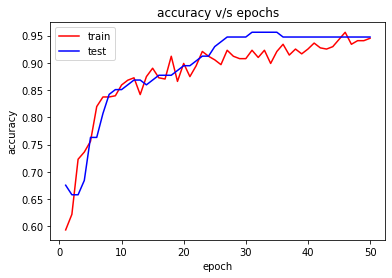

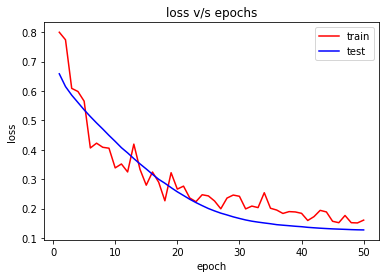

In [ ]:
plt.plot(range(1,51),history.history['accuracy'],color='red')
plt.plot(range(1,51),history.history['val_accuracy'],color='blue')
plt.title("accuracy v/s epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()
plt.plot(range(1,51),history.history['loss'],color='red')
plt.plot(range(1,51),history.history['val_loss'],color='blue')
plt.title("loss v/s epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()